
**[Audio Processing in Python Part I: Sampling, Nyquist, and the Fast Fourier Transform](https://makersportal.com/blog/2018/9/13/audio-processing-in-python-part-i-sampling-and-the-fast-fourier-transform)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')      
#https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

</br>

### **Sine Wave Sampling**

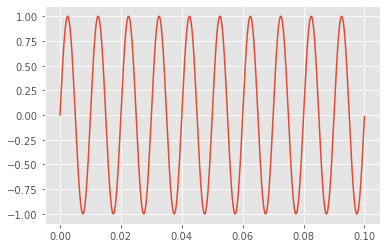

In [96]:
Fs = 44100                     # sampling rate
T = 1/Fs                       # sampling period
t = 0.1                        # seconds of sampling
N = Fs*t                       # total points in signal

freq = 100                     # in hertz, the desired natural frequency
omega = 2*np.pi*freq           # angular frequency for sine waves

t_vec = np.arange(N)*T         # time vector for plotting
y = np.sin(omega*t_vec)

#plt.figure(figsize=(20,5))
plt.plot(t_vec,y)
plt.show()

In [14]:
import IPython.display as ipd
ipd.Audio(y, rate = Fs)

</br>

### **Fast Fourier Transform**

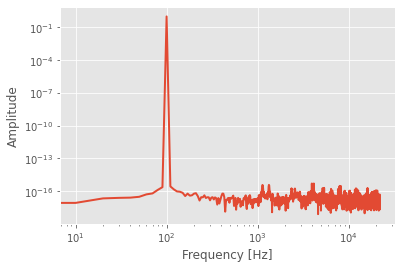

In [51]:
# divide by the length of the signal and only take half of the data(single-sided spectrum)
Y_k = np.fft.fft(y)[0:int(N/2)]/N           # FFT function from numpy
Y_k[1:] = 2*Y_k[1:]                             # need to take the single-sided spectrum only
Pxx = np.abs(Y_k)                               # be sure to get rid of imaginary part

f = Fs*np.arange((N/2))/N                   # frequency vector


fig, ax = plt.subplots()
plt.plot(f, Pxx, linewidth = 2)
ax.set_xscale('log')
ax.set_yscale('log')
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

</br>
</br>

[Audio Processing in Python Part II: Exploring Windowing, Sound Pressure Levels, and A-Weighting Using an iPhone X](https://makersportal.com/blog/2018/9/17/audio-processing-in-python-part-ii-exploring-windowing-sound-pressure-levels-and-a-weighting-using-an-iphone-x)

这篇指南理解有障碍，特别是麦克风的那个部分，下面代码运行有些问题，手机播放测试音的时机不清楚，先暂时搁置

In [67]:
import pyaudio  #https://people.csail.mit.edu/hubert/pyaudio/
import time

In [ ]:

form_1 = pyaudio.paInt16            # 16-bit resolution
chans = 1                           # 1 channel
samp_rate = 44100
chunk = 8192                        # 2^13 sample for buffer
dev_index = 5                       # device index found by p.get_device_info_by_index(ii)

audio = pyaudio.PyAudio()             # create pyaudio instantiation

# create pyaudio stream
stream = audio.open(format = form_1, rate = samp_rate, channels = chans, \
                    input_device_index = dev_index, input = True,\
                   frames_per_buffer = chunk)

# record data chunk
stream.start_stream()
data = np.fromstring(stream.read(chunk), dtype=np.int16)
stream.stop_stream()

# mic sensitivity correction and bit conversion
mic_sens_dBV = -47.0                 # mic sensitivity in dBV + any gain
mic_sens_corr = np.power(10.0, mic_sens_dBV/20.0)      # calculate mic sensitivity conversion factor

data = ((data/np.power(2.0,15))*5.25)*(mic_sens_corr)

f_vec = samp_rate*np.arange(chunk/2)/chunk
mic_low_freq = 100
low_freq_loc = np.argmin(np.abs(f_vec-mic_low_freq))
fft_data = (np.abs(np.fft.fft(data))[0:int(np.floor(chunk/2))])/chunk
fft_data[1:] = 2*fft_data[1:]

max_loc = np.argmax(fft_data[low_freq_loc:]) + low_freq_loc

# plot
plt.style.use('ggplot')
plt.rcParams['font.size']=18
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.plot(f_vec, fft_data)
ax.set_ylim([0.2*np.max(fft_data)])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [Pa]')
ax.set_xscale('log')
plt.grid(True)

# max frequency resolution
annot = ax.annotate('Freq: %2.1f'%(f_vec[max_loc]),xy=(f_vec[max_loc],fft_data[max_loc]),\
                    xycoords='data',xytext=(0,30),textcoords='offset points',\
                    arrowprops=dict(arrowstyle="->"),ha='center',va='bottom')
    
plt.savefig('fft_1kHz_signal.png',dpi=300,facecolor='#FCFCFC')
plt.show()

</br>
</br>

### **附**

关于采样分辨率（sample resolution）与量化（quantization），延伸阅读：

+ [audio-handling-basics-how-to-process-audio-files-using-python-cli](https://hackernoon.com/audio-handling-basics-how-to-process-audio-files-using-python-cli-jo283u3y)

+ [digital_communication_quantization](https://www.tutorialspoint.com/digital_communication/digital_communication_quantization.htm)

+ [wiki-quantization](https://en.wikipedia.org/wiki/Quantization_(signal_processing))